<IPython.core.display.Javascript object>


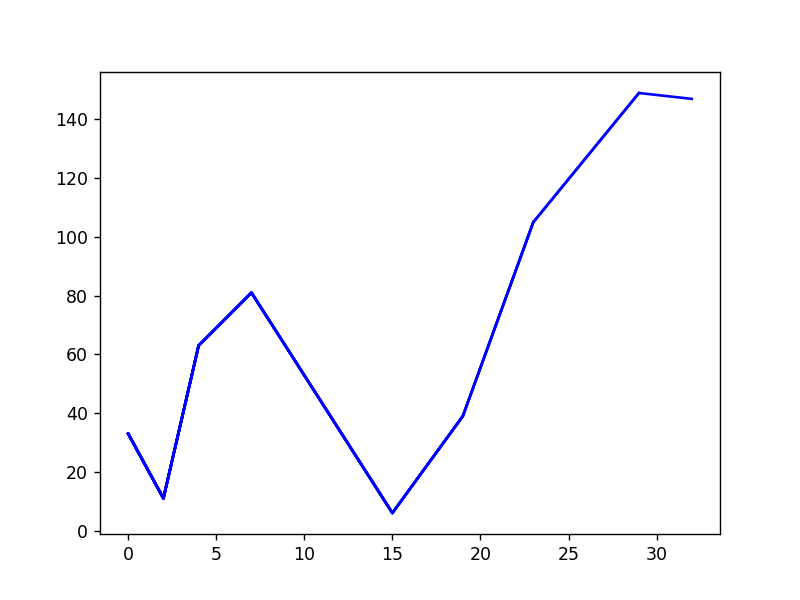

<IPython.core.display.Javascript object>


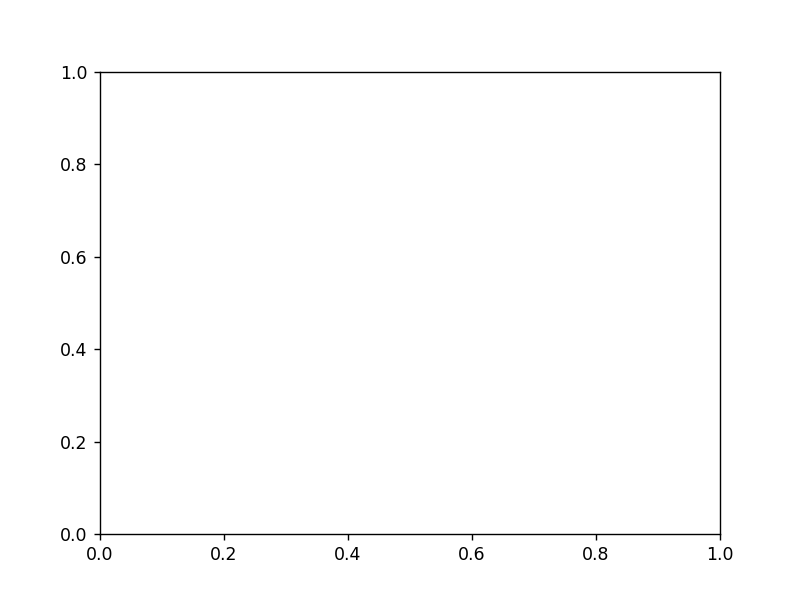

<IPython.core.display.Javascript object>


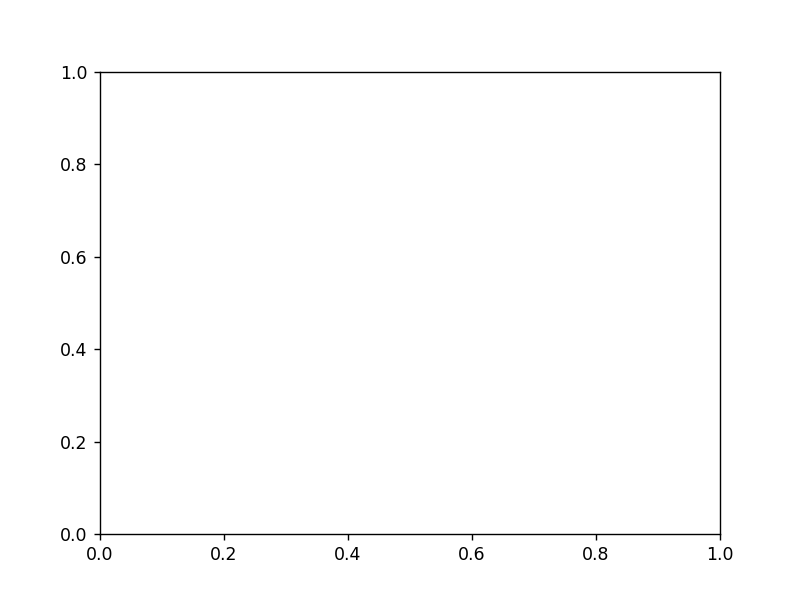

<IPython.core.display.Javascript object>


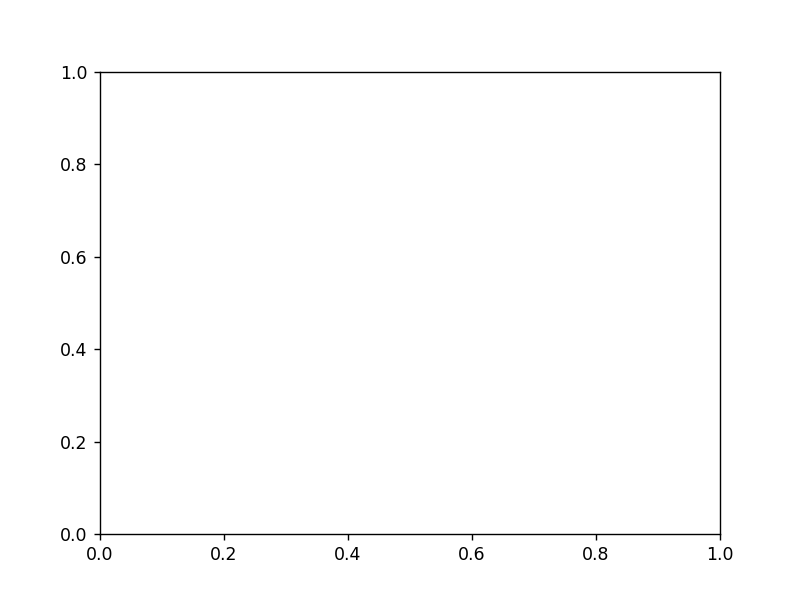

<IPython.core.display.Javascript object>


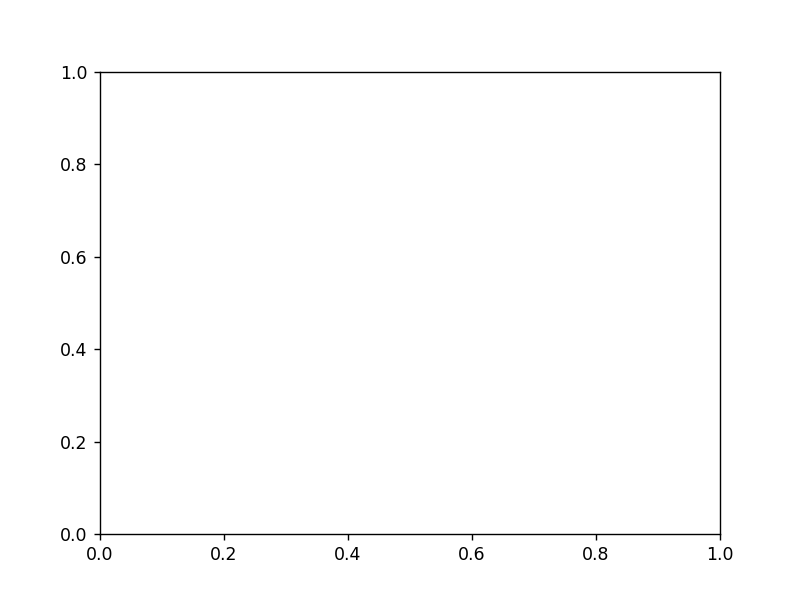

In [1]:
import time
import psutil
import matplotlib.pyplot as plt

%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

olla = plt.figure()
ax_olla = olla.add_subplot(111)
olla.show()
x_olla = []
y_olla = []

nevera = plt.figure()
ax_nevera = nevera.add_subplot(111)
nevera.show()
x_nevera = []
y_nevera = []

personas = plt.figure()
ax_personas = personas.add_subplot(111)
personas.show()
x_personas = []
y_personas = []

alexa = plt.figure()
ax_alexa = alexa.add_subplot(111)
alexa.show()
x_alexa = []
y_alexa = []

tanque = plt.figure()
ax_tanque = tanque.add_subplot(111)
tanque.show()
x_tanque = []
y_tanque = []



In [ ]:
import sys
import paho.mqtt.client
import json


def on_connect(client, userdata, flags, rc):
    print('connected (%s)' % client._client_id)
    client.subscribe(topic='casa/#', qos=2)


def on_message(client, userdata, message):
    content = message.payload
    jsondecoded = json.loads(content.decode('utf-8'))
    print(jsondecoded["reporte"])
    graficar(jsondecoded["reporte"], jsondecoded["tiempo"], str(message.topic))
    
    
def graficar(a, b, topic):
    
    if topic == "casa/cocina/temperatura_olla":
        x_olla.append(b)
        y_olla.append(a)
        ax_olla.plot(x_olla, y_olla, color ='b')
        olla.canvas.draw()
    if topic == "casa/cocina/temperatura_nevera":
        x_nevera.append(b)
        y_nevera.append(a)
        ax_nevera.plot(x_nevera, y_nevera, color ='b')
        nevera.canvas.draw()
    if topic == "casa/sala/contador_personas":
        x_personas.append(b)
        y_personas.append(a)
        ax_personas.plot(x_personas, y_personas, color ='b')
        personas.canvas.draw()
    if topic == "casa/sala/alexa_echo":
        x_alexa.append(b)
        y_alexa.append(a)
        ax_alexa.plot(x_alexa, y_alexa, color ='b')
        alexa.canvas.draw()
    if topic == "casa/baño/nivel_tanque":
        x_tanque.append(b)
        y_tanque.append(a)
        ax_tanque.plot(x_tanque, y_tanque, color ='b')
        tanque.canvas.draw()    


def main():
    client = paho.mqtt.client.Client(client_id='grafica-subs', clean_session=False)
    client.on_connect = on_connect
    client.on_message = on_message
    client.connect(host='127.0.0.1', port=1883)
    client.loop_forever()


if __name__ == '__main__':
    main()
    sys.exit(0)

connected (b'grafica-subs')
33
11
63
81
6
39
105
